# Clusters

In this notebook, we check the cluster output sample

In [46]:
import sys
sys.path.append("/home/s1/jesteves/git/ccopa/python")
from main import copacabana
from make_input_files.make_input_datasets import *

In [47]:
import pandas as pd
from astropy.table import Table, vstack, join
from astropy.io.fits import getdata
import numpy as np
import matplotlib.pyplot as plt

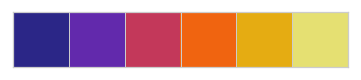

In [48]:
import seaborn as sns; sns.set(color_codes=True)
sns.set_style("whitegrid")
sns.palplot(sns.color_palette("CMRmap"))

In [49]:
## colors
blue = '#2E86C1'
gray = '#A6ACAF'
red = '#A93226'

### Loading Input Catalog

In [67]:
cfg = '../config_files/config_buzzard_v2.yaml'
copa = copacabana(cfg)

# run   ='test'
run   ='emuBPZ-rhod'
cat   = copa.load_copa_out('cluster',run=run)

mask= np.isnan(cat['Ngals'])
cat = cat[np.logical_not(mask)]

master file: 
 /data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/output/tiles/buzzard_v2.0.0_copa_golden_00000.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/output/tiles/buzzard_v2.0.0_copa_golden_00001.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/output/tiles/buzzard_v2.0.0_copa_golden_00002.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/output/tiles/buzzard_v2.0.0_copa_golden_00003.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/output/tiles/buzzard_v2.0.0_copa_golden_00004.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/output/tiles/buzzard_v2.0.0_copa_golden_00005.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/output/tiles/buzzard_v2.0.0_copa_golden_00006.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/output/tiles/buzzard_v2.0.0_copa_golden_00007.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/output/tiles/buzzard_v2.0.0_copa_golden_00008.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/output/tiles/buzzard_v2.0.0_copa_gol

KeyError: "Unable to open object (object 'emuBPZ-rhod' doesn't exist)"

In [ ]:
cat.colnames

In [ ]:
zcls  = cat['redshift']
r200  = cat['R200']
nbkg  = cat['Nbkg']

ngals = cat['Ngals']
mu    = cat['MU'] 
muErr = cat['MU_ERR_JK']

nbkgt = cat['Nbkg_true']
ngalst= cat['Ngals_true']
mut   = cat['MU_TRUE']
mutErr= cat['MU_TRUE_ERR_JK']

m200  = cat['M200_true']
r200t = cat['R200_true']

In [ ]:
logm  = np.log10(m200)


In [68]:
sys.path.append("/home/s1/jesteves/git/ccopa/notebooks/")
from myplots import *

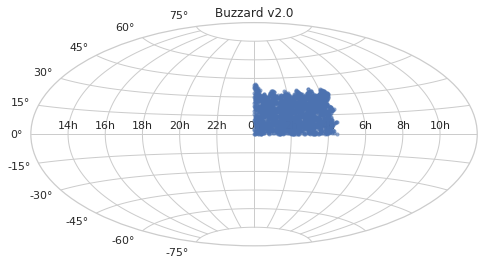

In [69]:
sky_plot(cat['RA'],cat['DEC'],title='Buzzard v2.0',savefig='sky_plot.png')

### Overall Accuracy

In [70]:
w = np.where(ngalst>1)[0]
residual = (mu[w]/mut[w])
mask2    = np.logical_not(np.isnan(residual))&np.logical_not(np.isinf(residual))
mask     = remove_outliers(residual,n=2)&(mask2)

xm      = np.mean(residual[mask])
xstd    = np.std(residual[mask])

print(r'mean: %.3f'%(xm))
print(r'rms : %.3f'%(xstd))

mean: 0.975
rms : 0.124


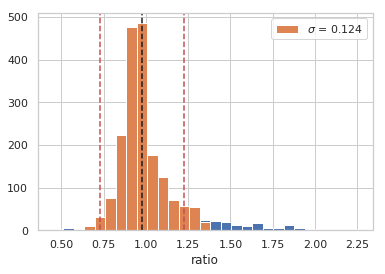

In [71]:
xmin,xmax = 0.45, 2.25
xbins = np.linspace(xmin,xmax,30)
_ = plt.hist(residual,bins=xbins)
_ = plt.hist(residual[mask],bins=xbins,label=r'$\sigma$ = %.3f'%(xstd))
plt.axvline(xm,color='k',ls='--')
plt.axvline(xm+2*xstd,color='r',ls='--')
plt.axvline(xm-2*xstd,color='r',ls='--')

#plt.yscale('log')
plt.xlabel('ratio')
plt.legend()

### Scaling Relations

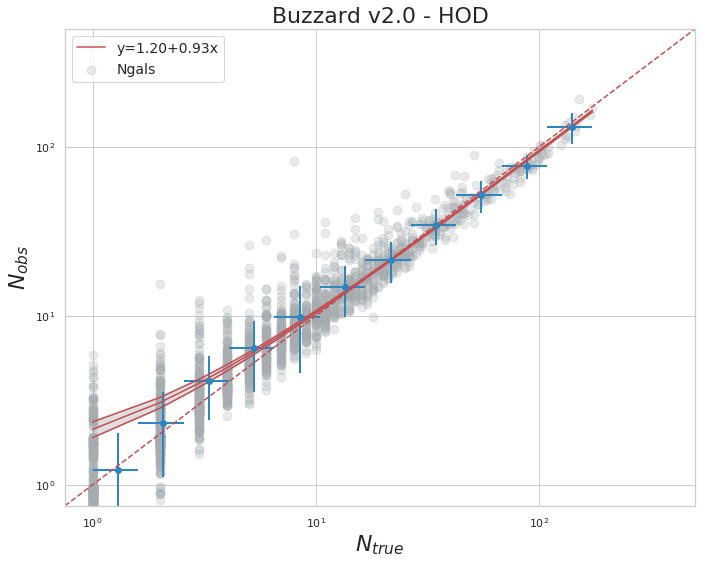

In [72]:
plot_scaling_relation(ngalst,ngals,title='Buzzard v2.0 - HOD',xlims=(0.75,500),fit=True)

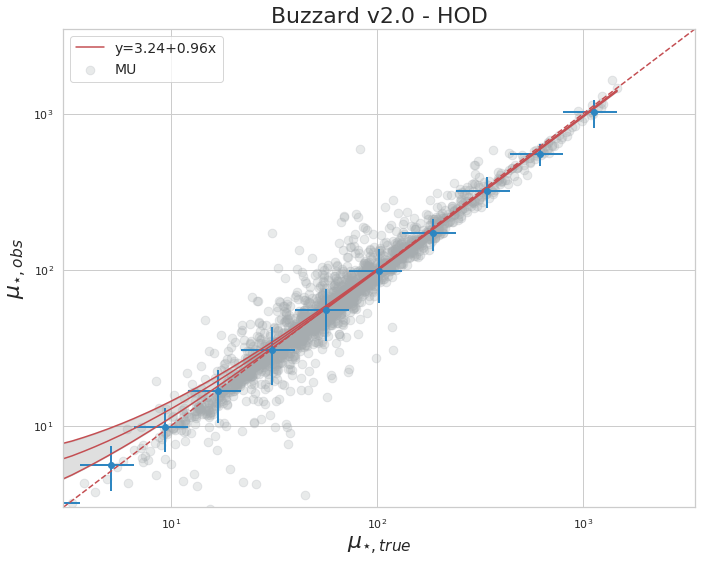

In [73]:
plot_scaling_relation(mut,mu,xl=r'$\mu_{\star,true}$',yl=r'$\mu_{\star,obs}$',title='Buzzard v2.0 - HOD',xlims=(3,3500),fit=True)

#### Residuals

/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in divide
  import sys


[0.21761248 0.26277126 0.25484603 0.27194772 0.25843624 0.30702146
 0.28098705 0.30751895 0.36542579 0.41605234]
[0.32495913 0.2411166  0.23834739 0.21237408 0.1648787  0.16013277
 0.09546774 0.12285833]
[0.40369448 0.34580922 0.37651717 0.32967421 0.27800208 0.28077259
 0.26118167 0.221919   0.22600488 0.18075143]


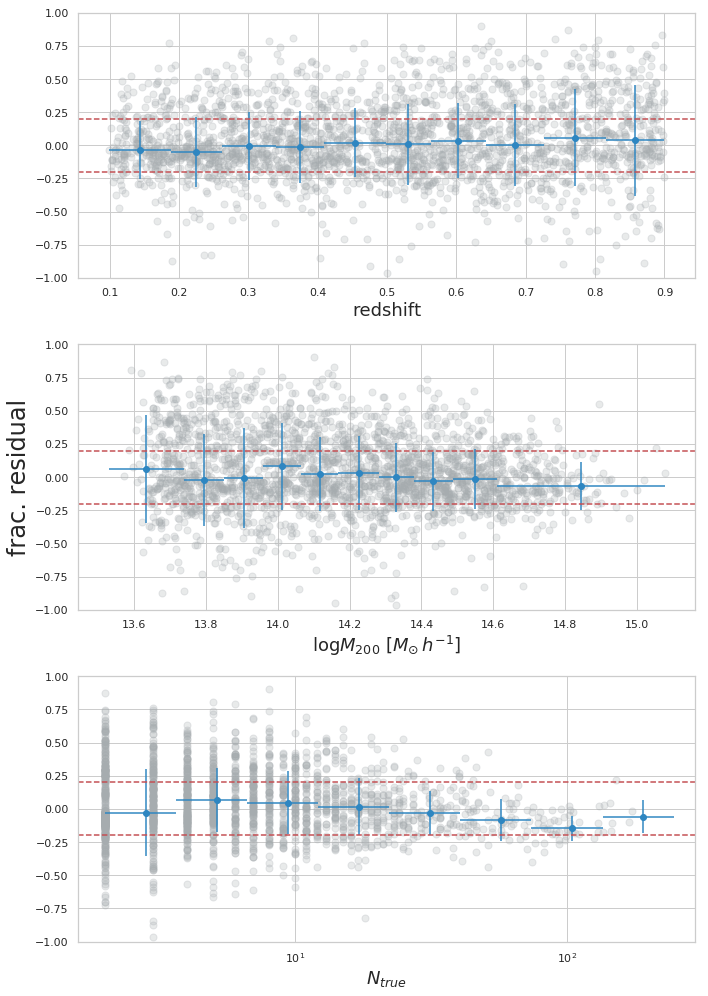

In [81]:
plot_triple_pannel(zcls,ngalst,logm,ngals,ngalst,ymax=1.,save=None)

In [75]:
def plot_residual(xvar,yvar1,yvar2, ax=None, xlabel='redshift', xbins=None,log=False):
    if ax is None: ax = plt.axes()
    
    if xbins is None:
        xbins = splitBins(xvar)
    
    residual = (1-yvar2/yvar1)
    if log:
        residual = np.log(yvar2/yvar1)
    mask2    = np.logical_not(np.isnan(residual))&np.logical_not(np.isinf(residual))
    mask     = remove_outliers(residual,n=5)&(mask2)
    if log:
        mask     = remove_outliers(residual,n=5)&(mask2)
    
    nmask    = np.logical_not(mask)
    of       = 1.-1.*np.count_nonzero(mask)/len(yvar1)
    
    keys, xvarb = makeBins(xvar[mask],xbins)
    xvarb_std = np.diff(xbins)/2
    
    residualb = np.array([np.nanmedian(residual[mask][idx]) for idx in keys])
    residualb_std = np.array([np.nanstd(residual[mask][idx]) for idx in keys])
    
    ax.scatter(xvar[nmask],residual[nmask],color='r',alpha=0.25,s=50,label='Outlier fraction: %.2f'%(of))
    ax.scatter(xvar,residual,color='#A6ACAF',alpha=0.25,s=50)
    ax.errorbar(xvarb,residualb,xerr=xvarb_std,yerr=residualb_std,color='#2E86C1',fmt='o')
    print(residualb_std)
    ax.set_xlabel(xlabel,fontsize=18)
    #ax.legend()

In [76]:
def plot_triple_pannel(zcls,ntru,logm,yvar1,yvar2,title='Residuals',save=None,ymin=-1,ymax=1.5):
    ylabel=r'frac. residual'
    ngbins = np.logspace(np.log10(2),1.2*np.nanpercentile(np.log10(yvar2),99),9)
    
    fig, ax = plt.subplots(3, 1, sharey='col', figsize=(10,14))
    fig.subplots_adjust(hspace=0.4,wspace=0.6)
    
    plot_residual(zcls,yvar1,yvar2,ax=ax[0])
    plot_residual(ntru,yvar1,yvar2,ax=ax[2],xlabel=r'$N_{true}$',xbins=ngbins)
    plot_residual(logm,yvar1,yvar2,ax=ax[1],xlabel=r'$\log{M_{200}}$ [$M_{\odot}\, h^{-1}$]')

    #fig.suptitle(title,fontsize=18)

    ax[1].set_ylabel(ylabel,fontsize=24)
    ax[2].set_xscale('log')
    ax[0].set_ylim(ymin,ymax)
    ax[2].set_xlim(0.8*ngbins[0],1.2*ngbins[-1])
    for i in range(3):
        ax[i].axhline(0.2,color='r',linestyle='--')
        ax[i].axhline(-0.2,color='r',linestyle='--')
    fig.tight_layout()
    
    if save:
        plt.savefig(save,bb_box='tight')
    #fig.clf()
    pass

/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in divide
  import sys


[0.15187633 0.17435633 0.1720205  0.17267822 0.19377069 0.23154496
 0.20056694 0.18479255 0.21203241 0.22920398]
[0.17550008 0.19760926 0.16380444 0.14115668 0.06812637        nan
        nan        nan]
[0.23003282 0.21788386 0.24560265 0.19437285 0.18275034 0.19186563
 0.20914154 0.16359846 0.16496697 0.12479376]


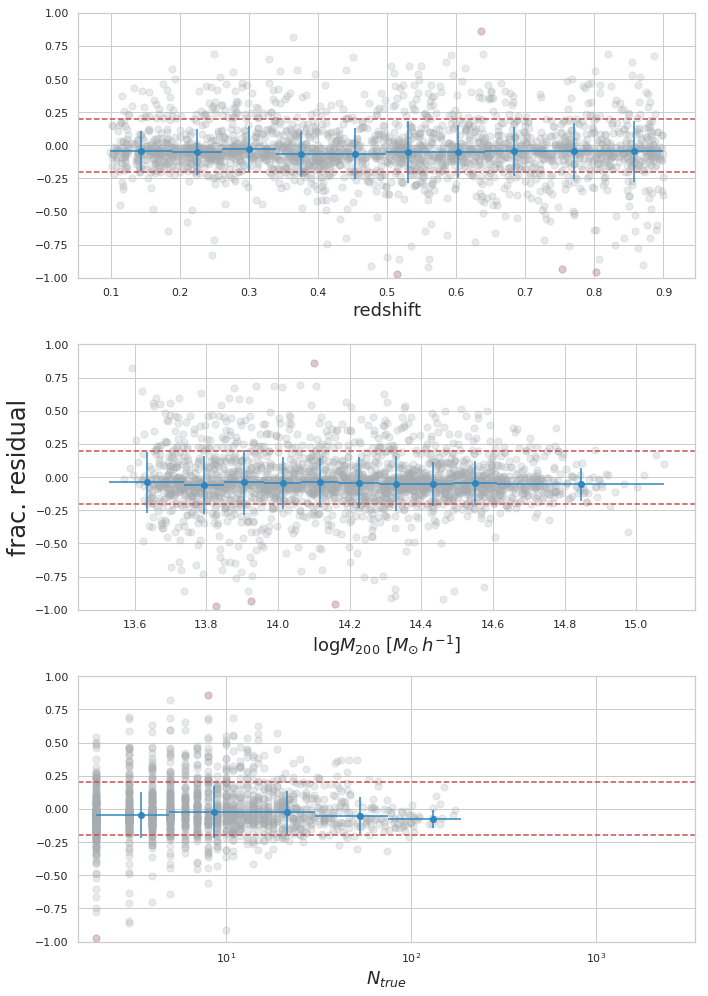

In [80]:
plot_triple_pannel(zcls,ngalst,logm,mu,mut,ymax=1.,save=None)

/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in divide
  import sys
/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in divide
  if __name__ == '__main__':


[0.84090094 0.8768138  0.68490795 0.75008912 0.67741334 0.67193287
 0.6635654  0.73737734 0.73812152 0.66452712]
[0.97298016 0.90612041 0.74013331 0.76815257 0.76417109 0.71698065
 0.73323114 0.63161351 0.62583017 0.52281834]
[0.82867751 0.84304975 0.82696097 0.81032581 0.76026278 0.68692003
 0.78041782 0.70919668 0.59393205 0.49570114]
[0.79212087 0.830201   0.85032277 0.72475191 0.69517601 0.76380353
 0.72025244 0.70958152 0.65831729 0.57666732]


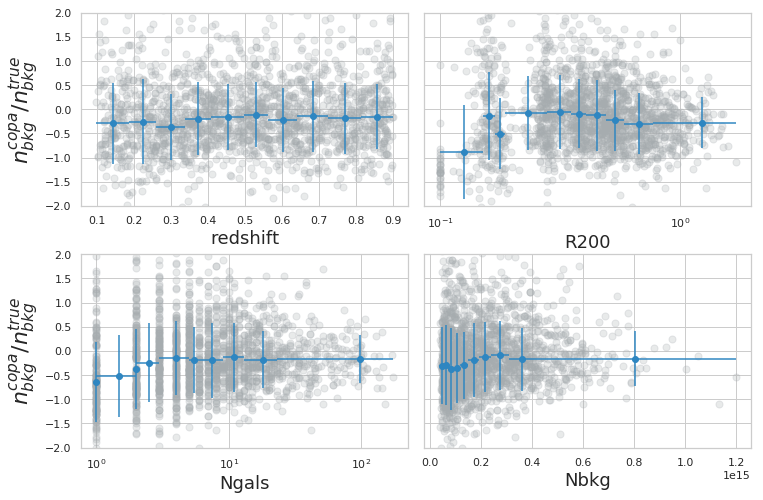

In [82]:
yl = r'$ n_{bkg}^{copa} /n_{bkg}^{true} $'
plot_four_pannel(zcls,r200,ngalst,m200,nbkgt,nbkg,ylabel=yl)

In [79]:
def plot_four_pannel(zcls,r200,ntrue,nbkg,x1,x2,ylabel='y',ylims=(-2,2)):
    fig, ax = plt.subplots(2, 2, sharey='all', figsize=(12,8))
    fig.subplots_adjust(hspace=0.25,wspace=0.05)

    ax = ax.flatten(order='F')

    plot_residual(zcls ,x1,x2,ax=ax[0],log=True)
    plot_residual(r200 ,x1,x2,ax=ax[2],log=True)
    plot_residual(ntrue,x1,x2,ax=ax[1],log=True)
    plot_residual(nbkg ,x1,x2,ax=ax[3],log=True)

    ax[0].set_xlabel('redshift')
    ax[1].set_xlabel('Ngals')
    ax[2].set_xlabel('R200')
    ax[3].set_xlabel('Nbkg')
    ax[1].set_xscale('log')
    ax[2].set_xscale('log')
    ax[0].set_ylim(ylims)
    ax[0].set_ylabel(ylabel,fontsize=22)
    ax[1].set_ylabel(ylabel,fontsize=22)
